# Indicadores da GGTOX

ESTE PROGRAMA IDENTIFICA O NÚMERO DE EXPEDIENTES TRAMITADOS POR SITUAÇÃO PARA A GGTOX 
PARA MEDIR A QUANTIDADE DE TRABALHO DEMANDADO, PRODUTIVIDADE DA ÁREA 
NUMERO DE ENTRADAS E FINALIZAÇÕES DE EXPEDIENTES POR ANO E MES 
ANALISA O TEMPO MÉDIO DE ANÁLISE DOS PROCESSOS CONSIDERANDO AS EXIGÊNCIAS FEITAS E O TEMPO DE FILA PARA ANÁLISE 

FONTES: 
1. RELATÓRIO SITUAÇÕES DE EXPEDIENTES DO DATAVISA-DV (SQLSERVER)
2. TABELA 'DE PARA' CÓDIGOS DE ASSUNTOS - 
3. TABELA 'DE PARA' SITUAÇÃO DOS PROCESSOS 
4. CRITÉRIOS PARA FILA
 
SAIDA: ARQUIVOS TXT PARA MONTAR A PUBLICAÇÃO NO SEI
 
Versões - Atualizações

1. Criado em 13/02/2023 




Comparando SAS x Panda https://pandas.pydata.org/docs/getting_started/comparison/comparison_with_sas.html

Leitura panda https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html #https://stackoverflow.com/questions/37395881/pandas-read-in-txt-file-without-headers
 


In [3]:
#pip install pyodbc
# importar bibliotecas
import pandas as pd
import numpy as np
import io



TESTAR BASE IND_FINAL NO BI
TRANSPOR 
GERAR BASE PARA MODELO

# 2. MODELANDO

## 2.1 ESTATISTICAS DESCRITIVAS

In [4]:
IND_FINAL   = pd.read_excel(r'C:\Users\alesa\OneDrive - ANVISA - Agencia Nacional de Vigilancia Sanitaria\000_ECD\TCC\Dados\IND_FINAL.xlsx',
                         header=0, sheet_name="Planilha1")
assuntos = pd.read_excel(r'C:\Users\alesa\OneDrive - ANVISA - Agencia Nacional de Vigilancia Sanitaria\GGTOX\3.INDICADORES\assuntos.xls',
                         header=0, sheet_name="ASSUNTOS")

In [5]:
IND_FINAL_0 = IND_FINAL[[#'SAIDA_A',
                       #'SAIDA_M',
                       #'ENTRADA_A',
                       #'ENTRADA_M',
                       'CO_ASSUNTO',
                       #'NU_PROCESSO',
                       'NU_EXPEDIENTE',
                       'RECURSO',
                       'CANCELADO',
                       'DT_FINALIZACAO',
                       'DT_ENTRADA',
                       #'DT_INICIO_SITUACAO',
                       #'DT_FIM_SITUACAO',
                       'CICLO_GGTOX',
                       'DIAS',
                       #'NU_CNPJ_EMPRESA',
                       #'NO_RAZAO_SOCIAL_EMPRESA',
                       #'NO_PRODUTO',
                       #'TIPO_PUBLICACAO',
                       #'DT_FIM_SITUACAO_LAG'
                       ]]

IND_FINAL_0 = pd.DataFrame(IND_FINAL_0[(IND_FINAL_0['CICLO_GGTOX'] == "3.1.Analise") |
                               (IND_FINAL_0['CICLO_GGTOX'] == '6.Tempo_total')]) 

#df = pd.DataFrame(df[(df['TIPO_PUBLICACAO'] == "1. Registro")]) 

IND_FINAL_0['RECURSO'] = np.where((IND_FINAL_0['RECURSO'] >= 1), 1, 0)
IND_FINAL_0['CANCELADO'] = np.where((IND_FINAL_0['CANCELADO'] >= 1), 1, 0)

IND_FINAL_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52109 entries, 0 to 100636
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CO_ASSUNTO      52109 non-null  int64         
 1   NU_EXPEDIENTE   52109 non-null  int64         
 2   RECURSO         52109 non-null  int32         
 3   CANCELADO       52109 non-null  int32         
 4   DT_FINALIZACAO  52109 non-null  datetime64[ns]
 5   DT_ENTRADA      52109 non-null  datetime64[ns]
 6   CICLO_GGTOX     52109 non-null  object        
 7   DIAS            52109 non-null  int64         
dtypes: datetime64[ns](2), int32(2), int64(3), object(1)
memory usage: 3.2+ MB


In [6]:
# Transpor os dados usando pivot_table
df_transposed = IND_FINAL_0.pivot_table(index=['CO_ASSUNTO', 'NU_EXPEDIENTE', 'RECURSO','CANCELADO',
                                     'DT_ENTRADA','DT_FINALIZACAO'],
                               columns='CICLO_GGTOX',
                               values='DIAS').reset_index()

# Renomear as colunas resultantes
df_transposed.columns.name = None

# Renomear as colunas adicionando um prefixo
df_transposed = df_transposed.rename(columns=lambda x: '' + str(x))

df_transposed.rename(columns={'3.1.Analise': 'ANALISE'}, inplace=True)
df_transposed.rename(columns={'6.Tempo_total': 'TOTAL'}, inplace=True)

assunto_tipo = assuntos[['CO_ASSUNTO','TIPO_PUBLICACAO']]
                       
df_transposed = df_transposed.merge(assunto_tipo, on="CO_ASSUNTO", how="left")
df_transposed = pd.DataFrame(df_transposed[(df_transposed['TIPO_PUBLICACAO'] == "1. Registro")]) 
df_transposed = df_transposed.drop(['TIPO_PUBLICACAO'], axis=1)
df_transposed.head()
df_transposed.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 22544 entries, 2220 to 32938
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CO_ASSUNTO      22544 non-null  int64         
 1   NU_EXPEDIENTE   22544 non-null  int64         
 2   RECURSO         22544 non-null  int64         
 3   CANCELADO       22544 non-null  int64         
 4   DT_ENTRADA      22544 non-null  datetime64[ns]
 5   DT_FINALIZACAO  22544 non-null  datetime64[ns]
 6   ANALISE         8291 non-null   float64       
 7   TOTAL           22544 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(4)
memory usage: 1.5 MB


In [7]:
df_transposed.isnull().sum()

CO_ASSUNTO            0
NU_EXPEDIENTE         0
RECURSO               0
CANCELADO             0
DT_ENTRADA            0
DT_FINALIZACAO        0
ANALISE           14253
TOTAL                 0
dtype: int64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

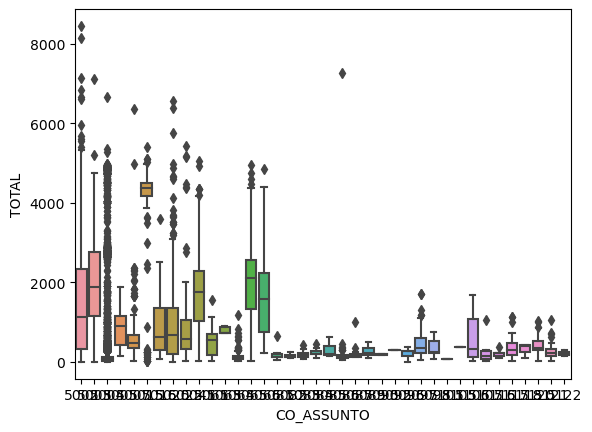

In [9]:
#Boxplot por categoria
sns.boxplot(x="CO_ASSUNTO", 
            y="TOTAL",
            data=df_transposed)
plt.show()

In [10]:
df_transposed['RECURSO'].value_counts()

#gráfico de barras
base_1['GENERO'].value_counts().plot(kind="bar")

#Gráfico de Pizza
base_1['GENERO'].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Contagem por Gênero")
plt.xlabel("Gênero")
plt.xticks(rotation=0)
plt.ylabel("Contagem")
plt.show()

#resumo das variáveis
df_transposed.describe()

#resumo por categoria
base_1[['GENERO','IDADE']].groupby("GENERO").describe()

#resumo de todas as variáveis numéricas por categoria
base_1.groupby("RACA_COR").mean()

#histograma
df_transposed['TOTAL'].plot.hist()

#boxlpot
df_transposed[['TOTAL']].boxplot()

#Boxplot por categoria
sns.boxplot(x="RACA_COR", 
            y="IDADE",
            hue="GENERO",
            data=base_1)
plt.show()

#Gráfico de dispersão
sns.distplot(df_transposed['TOTAL'])

#Gráfico de dispersao por assunto ou data finalização
sns.scatterplot(x="CO_ASSUNTO", y="TOTAL", 
                data=df_transposed)
plt.title("Gráfico de Dispersão Valor Total por Dias de Permanência")
plt.show()

NameError: name 'base_1' is not defined

In [ ]:
df_transposed['TOTAL'].plot.hist()

## Detecção de anomalias - Outliers

In [ ]:
#outliers semana 12 - detecção de anomalias

#importar bibliotecas
from sklearn.ensemble import IsolationForest

In [ ]:
df_transposed = pd.DataFrame(df_transposed[(df_transposed['CO_ASSUNTO'] == 5004)]) 

#Definir modelo de Isolation Forest - SOMENTE TOTAL
modelo=IsolationForest(n_estimators=100,max_samples='auto',random_state=0)
#Visualizar parâmetros do modelo
print(modelo.get_params())

variaveis_anomalia = ['TOTAL']

#Ajustar modelo multivariado
modelo.fit(df_transposed[variaveis_anomalia])

#Criar coluna chamada score
df_transposed['scores'] = modelo.decision_function(df_transposed[variaveis_anomalia])

df_transposed.info()

In [ ]:
#Definir modelo de Isolation Forest - CO_ASSUNTO e TOTAL
modelo=IsolationForest(n_estimators=100,max_samples='auto',random_state=0)
#Visualizar parâmetros do modelo
print(modelo.get_params())

colunas_analise = ['CO_ASSUNTO', 'TOTAL']

#Ajustar modelo multivariado
modelo.fit(df_transposed[colunas_analise])

#Criar coluna chamada score
df_transposed['scores'] = modelo.decision_function(df_transposed[colunas_analise])

df_transposed.head()



In [ ]:
#visualizar as anomalias
sns.pairplot(df_transposed,vars=df_transposed[variaveis_anomalia],hue='anomalia')
plt.show()

In [ ]:
df_transposed.to_excel('df_transposed.xlsx', sheet_name='Planilha1', index=False)

In [11]:
#tira na mão...com experiencia propria ajudado pelo 
df = pd.DataFrame(df_transposed[((df_transposed['CO_ASSUNTO'] == 5004) & (df_transposed['TOTAL'] >2)) |
                                   ((df_transposed['CO_ASSUNTO'] != 5004) & (df_transposed['TOTAL'] >29))])
df['CO_ASSUNTO_T'] = df['CO_ASSUNTO'].astype(str)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21936 entries, 2220 to 32938
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CO_ASSUNTO      21936 non-null  int64         
 1   NU_EXPEDIENTE   21936 non-null  int64         
 2   RECURSO         21936 non-null  int64         
 3   CANCELADO       21936 non-null  int64         
 4   DT_ENTRADA      21936 non-null  datetime64[ns]
 5   DT_FINALIZACAO  21936 non-null  datetime64[ns]
 6   ANALISE         8240 non-null   float64       
 7   TOTAL           21936 non-null  float64       
 8   CO_ASSUNTO_T    21936 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(4), object(1)
memory usage: 1.7+ MB


In [12]:
#TESTE.to_excel('TESTE.xlsx', sheet_name='Planilha1', index=False)
df.to_excel('df.xlsx', sheet_name='Planilha1', index=False)

Gerando arquivos txt para publicacao

1. Trabalhar dados: renomear colunas, transformar recursos cancelados. Missing. Encoding
2. Estatística exploratória
3. Modelar

Importar pdf direto...